
# Data Visualization with Matplotlib - Exercises 2

จงทำตามคำสั่งต่อไปนี้ด้วย data ที่กำหนดให้ต่อไปนี้

# 6521603795 Patiphat Aiamram

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## อ่านไฟล์ Superstore.csv

In [241]:
df = pd.read_csv('Superstore.csv',encoding = 'iso-8859-1')

In [3]:
df.head()

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   Day            9994 non-null   int64  
 4   Month          9994 non-null   int64  
 5   Year           9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


## Exercise 1

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 และตกแต่งให้สวยงาม


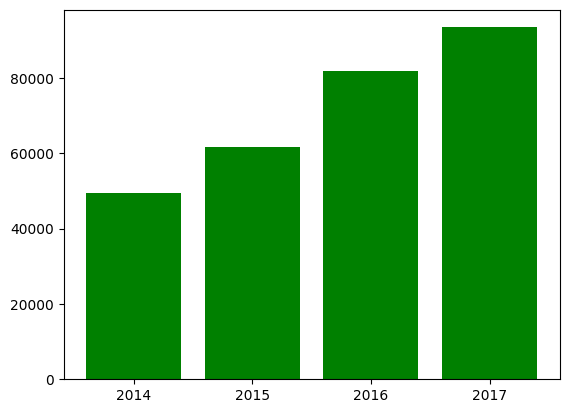

In [60]:
profit_year = df.groupby(['Year'])['Profit'].sum()
x = profit_year.index
y = profit_year
plt.bar(x, y, color = 'g' )
plt.xticks([2014, 2015, 2016, 2017])
plt.show()

## Exercise 2

จงวาดกราฟวงกลม แสดงเปอร์เซ็นต์การขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

np.int64(1945)

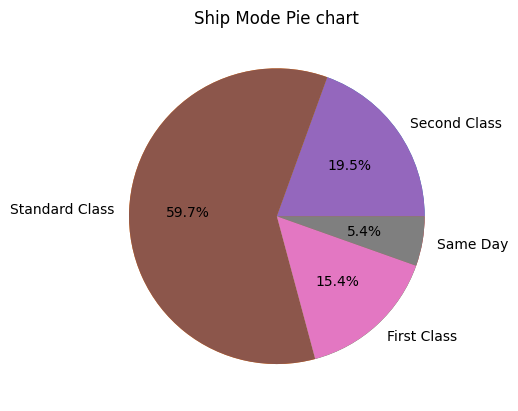

In [70]:
a = df[df['Ship Mode'] == 'Second Class']['Ship Mode'].count()
b = df[df['Ship Mode'] == 'Standard Class']['Ship Mode'].count()
c = df[df['Ship Mode'] == 'First Class']['Ship Mode'].count()
d = df[df['Ship Mode'] == 'Same Day']['Ship Mode'].count()
data = [a, b, c, d]
lb = ['Second Class', 'Standard Class', 'First Class', 'Same Day']
plt.title('Ship Mode Pie chart')
plt.pie(data, labels=lb, autopct='%.1f%%')
plt.pie(data)
plt.show()


## Exercise 3

จงวาดกราฟความถี่นับจำนวนส่วนลด (Discount) พร้อมตกแต่งให้สวยงาม

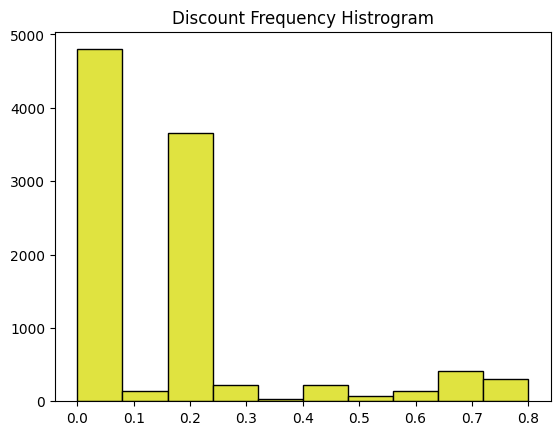

In [278]:
plt.title('Discount Frequency Histrogram')
plt.hist(df['Discount'], ec='k', color='#e0e340')
plt.show()

## Exercise 4

จงวาดกราฟจุด(Scatter) แสดงราคาขายกับกำไรที่ได้ (Sales , Profit) พร้อมตกแต่งให้สวยงาม

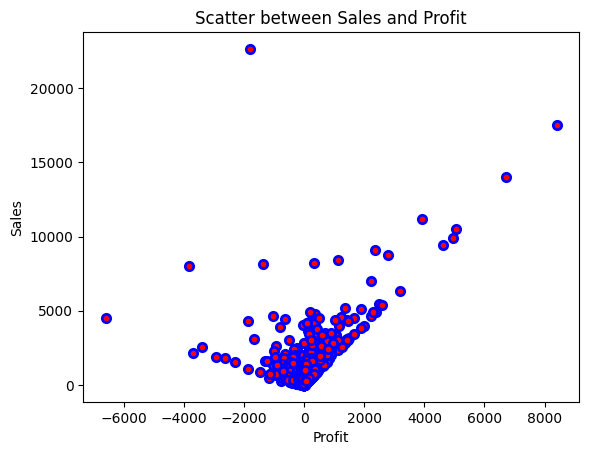

In [277]:
x = df['Profit']
y = df['Sales']
plt.scatter(x , y, marker = 'o', c ='r', ec = 'b', lw = 2)
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title('Scatter between Sales and Profit')
plt.show()

## Exercise 5

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 ของแต่ละหมวดหมู่ในกราฟเดียว(แกน x เป็นปี) พร้อมตกแต่งให้สวยงาม

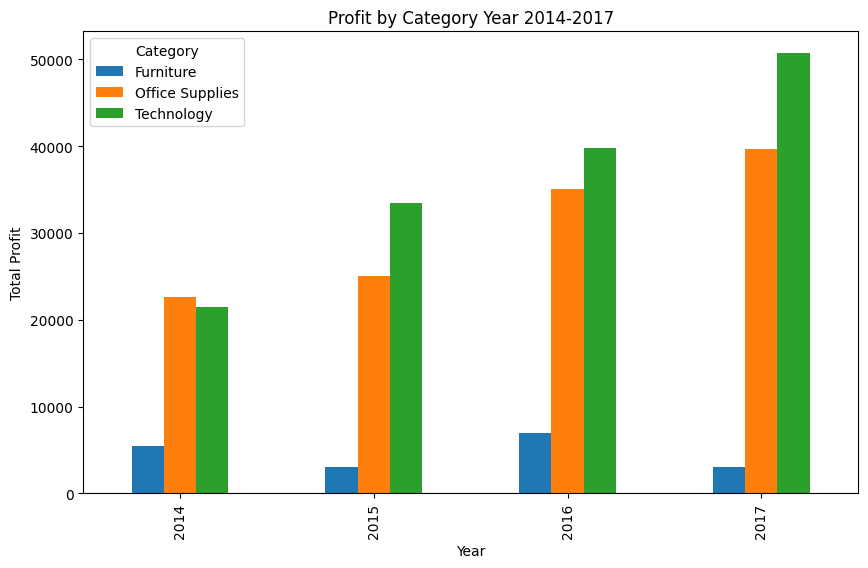

In [279]:
a = df.groupby(['Year', 'Category'])['Profit'].sum().unstack()
a.plot(kind='bar', figsize=(10, 6))

plt.title('Profit by Category Year 2014-2017')
plt.xlabel('Year')
plt.ylabel('Total Profit')

plt.legend(title='Category')
plt.show()

## Exercise 6
จงวาดกราฟแท่งแสดงรายได้ของแต่ละหมวด ตั้งแต่ปี 2014-2017 แบบแยกกราฟ (1หมวด 1กราฟ) พร้อมตกแต่งให้สวยงาม

np.float64(145454.9481)

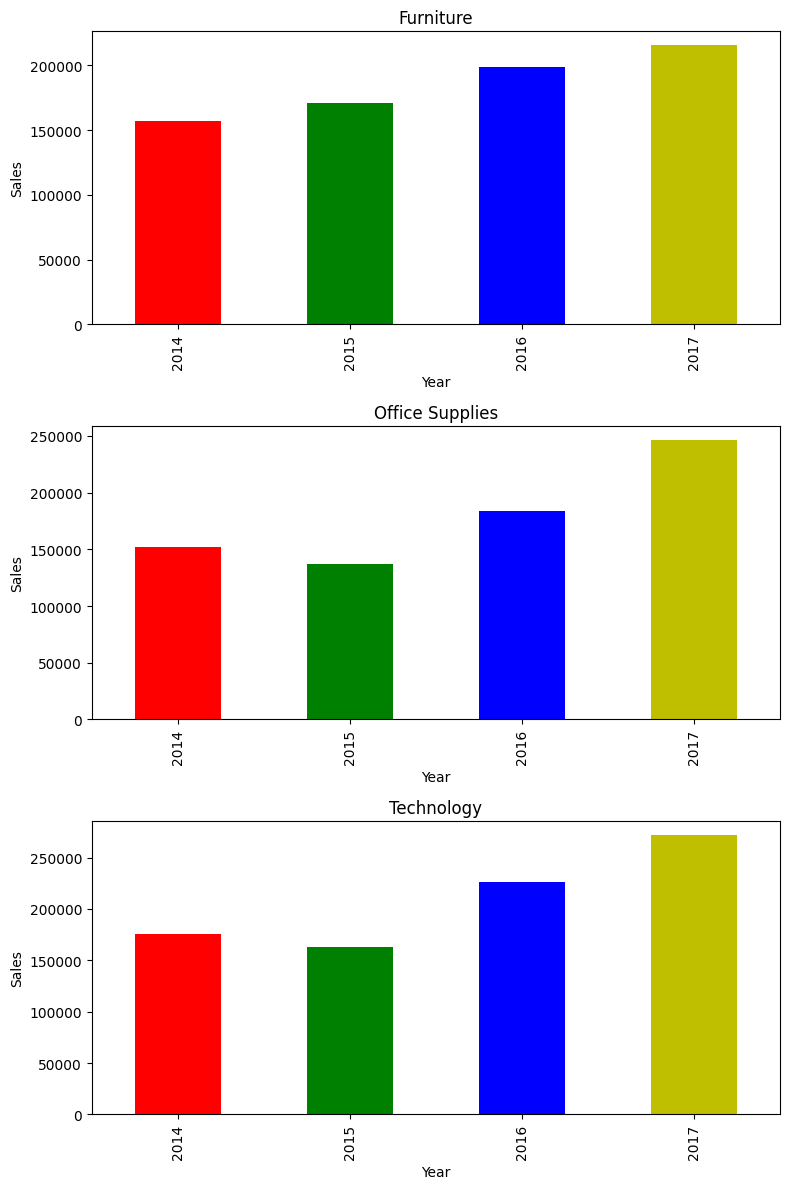

In [275]:
category_sales = df.groupby(["Category", "Year"])["Sales"].sum().unstack()

fig, axes = plt.subplots(nrows=3, figsize=(8, 12))

for ax, (category, sales) in zip(axes, category_sales.iterrows()):
    sales.plot(kind="bar", ax=ax, color=['r','g','b','y'] )
    ax.set_title(f"{category}")
    ax.set_ylabel("Sales")
    ax.set_xlabel("Year")
    
plt.tight_layout()
plt.show()

## Exercise 7

จงวาด Box plot ของยอดขาย และกำไร พร้อมตกแต่งให้สวยงาม (แนะนำให้แยกกราฟ)

In [276]:
df['Quantity']

np.int64(37873)

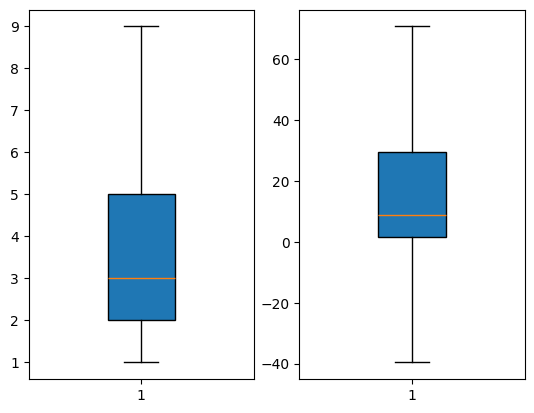

In [272]:
x = df['Quantity']
y = df['Profit']
data = [x,y]
fig , axes = plt.subplots(ncols=2)
axes[0].boxplot(x, sym='',vert=True, widths=0.3, label='Quantity',patch_artist=True)
axes[1].boxplot(y, sym='',vert=True, widths=0.3, label='Profit',patch_artist=True)
plt.show()

## Exercise 8

จงวาดกราฟแท่งแสดงจำนวน Furniture ที่ขายได้ในแต่ละไตรมาส (จำนวนให้นับจาก Quantity)

In [264]:
dffur = df[df['Category'] == 'Furniture']
dffur

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Quarter
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Quarter 4
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Quarter 4
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Quarter 4
5,CA-2014-115812,Brosina Hoffman,Consumer,9,6,2014,Standard Class,Los Angeles,California,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,Quarter 2
10,CA-2014-115812,Brosina Hoffman,Consumer,9,6,2014,Standard Class,Los Angeles,California,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,Quarter 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,CA-2015-168088,Corinna Mitchell,Home Office,19,3,2015,First Class,Houston,Texas,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704,Quarter 1
9964,CA-2016-146374,Harold Engle,Corporate,5,12,2016,Second Class,Newark,Delaware,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320,Quarter 4
9980,US-2015-151435,Shaun Weien,Consumer,6,9,2015,Second Class,Lafayette,Louisiana,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548,Quarter 3
9989,CA-2014-110422,Tom Boeckenhauer,Consumer,21,1,2014,Second Class,Miami,Florida,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,Quarter 1


In [265]:
def set_quarter(a):
    if a in range(1 ,4):
        return 'Quarter 1'
    elif a in range(4, 7):
        return 'Quarter 2'
    elif a in range(7, 10):
        return 'Quarter 3'
    elif a in range(10, 13):
        return 'Quarter 4'

dffur['Quarter'] = dffur['Month'].apply(set_quarter)
dffur

C:\Users\francis\AppData\Local\Temp\ipykernel_13928\748045746.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffur['Quarter'] = dffur['Month'].apply(set_quarter)


,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Quarter
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Quarter 4
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Quarter 4
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Quarter 4
5,CA-2014-115812,Brosina Hoffman,Consumer,9,6,2014,Standard Class,Los Angeles,California,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,Quarter 2
10,CA-2014-115812,Brosina Hoffman,Consumer,9,6,2014,Standard Class,Los Angeles,California,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,Quarter 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,CA-2015-168088,Corinna Mitchell,Home Office,19,3,2015,First Class,Houston,Texas,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704,Quarter 1
9964,CA-2016-146374,Harold Engle,Corporate,5,12,2016,Second Class,Newark,Delaware,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320,Quarter 4
9980,US-2015-151435,Shaun Weien,Consumer,6,9,2015,Second Class,Lafayette,Louisiana,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548,Quarter 3
9989,CA-2014-110422,Tom Boeckenhauer,Consumer,21,1,2014,Second Class,Miami,Florida,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,Quarter 1


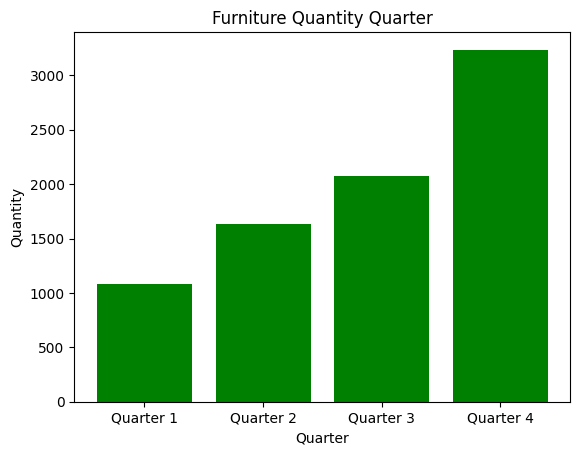

In [270]:
data = dffur.groupby(['Quarter'])['Quantity'].sum()
x = data.index
y = data
plt.xticks([0,1,2,3])
plt.xlabel('Quarter')
plt.ylabel('Quantity')
plt.title('Furniture Quantity Quarter')
plt.bar(x,y, color='g')
plt.show()